This script simulates stock price movements using the Geometric Brownian Motion (GBM) model with Monte Carlo methods. 
It generates multiple paths of stock prices over a specified time horizon, incorporating drift and volatility, and visualizes the results with a plot.

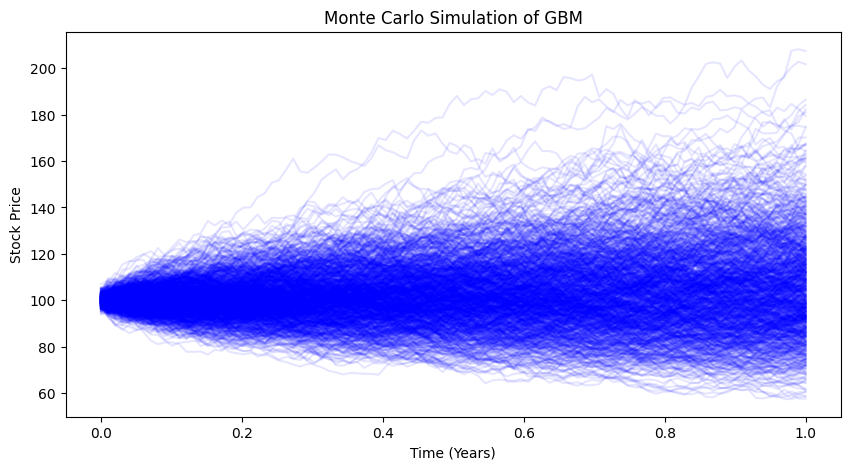

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def gbm_monte_carlo(S0, mu, sigma, T, dt, n_paths):
    """
    Simulate Geometric Brownian Motion using Monte Carlo method.
    :param S0: Initial stock price
    :param mu: Drift (expected return)
    :param sigma: Volatility
    :param T: Time horizon (years)
    :param dt: Time step
    :param n_paths: Number of Monte Carlo paths
    :return: Simulated stock price paths
    """
    N = int(T / dt)  # Number of time steps
    t = np.linspace(0, T, N)
    dW = np.random.normal(scale=np.sqrt(dt), size=(n_paths, N))  # Brownian motion increments
    W = np.cumsum(dW, axis=1)  # Brownian motion paths
    
    # Apply GBM formula using Ito's Lemma (log transformation)
    log_S0 = np.log(S0)
    log_S = log_S0 + (mu - 0.5 * sigma**2) * t + sigma * W
    S = np.exp(log_S)  # Transform back from log to real values
    
    return t, S

# Parameters
S0 = 100    # Initial stock price
mu = 0.05   # Expected return (drift)
sigma = 0.2 # Volatility
T = 1       # Time horizon in years
dt = 0.01   # Time step
n_paths = 1000 # Number of Monte Carlo simulations

# Run simulation
t, S = gbm_monte_carlo(S0, mu, sigma, T, dt, n_paths)

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(t, S.T, alpha=0.1, color='blue')
plt.title('Monte Carlo Simulation of GBM')
plt.xlabel('Time (Years)')
plt.ylabel('Stock Price')
plt.show()
